# API Call to Articles API for Proving Zipf Law 

In [3]:
import requests
import logging
from bs4 import BeautifulSoup
import json
import glob
import os
import re
import datetime
import string
from nltk.corpus import stopwords
from collections import Counter
logger = logging.getLogger(__name__)

In [37]:
r = requests.get("http://api.nytimes.com/svc/search/v2/articlesearch.json?&api-key=ad7cc4f2ca2d4c518eb2d88b3e768657")
type(r) #Requests.modal.response is a request object obtained

In [13]:
data = r.json() #To extract in form of JSON data

In [14]:
with open('article_value_response.txt', 'w') as outfile:
    json.dump(data, outfile)
data

In [64]:
def checkpath(path): # This is defining the check path for ensuring tat path is not previously created
    if not os.path.exists(path): # Check for path
        os.makedirs(path) # Make one if not 
    return True # Return if not tru

In [42]:
files=glob.glob('apicall/article/*')
newsWords=[]
for file in files:
    with open(file) as data_file:    
        data = json.load(data_file)
        x=data['response']['docs']
        for each in x:
            snippet=str(each['snippet'])
            words=re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', snippet)        
            newsWords.append(words)
newsWords=sum(newsWords,[])

In [43]:
newsWords=[''.join(c for c in s if c not in string.punctuation) for s in newsWords]
newsWords = [s for s in newsWords if s]

In [41]:
stop = stopwords.words('english')
print(sorted(stop))
newsWords = [word for word in newsWords if word not in stop]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', 'd', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', 'has', 'hasn', 'have', 'haven', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', 'more', 'most', 'mustn', 'my', 'myself', 'needn', 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', 'she', 'should', 'shouldn', 'so', 'some', 'such', 't', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'v

In [22]:
len(newsWords)

143633

In [31]:
newsWords_LowerCaseWords = [word for word in newsWords if word not in stop]
newsWords_LowerCaseWords=[x.lower() for x in newsWords]
newsWords_LowerCaseWords =  [word for word in newsWords if word not in "The"]
WordFrequency=Counter(newsWords_LowerCaseWords).most_common(100)
dict_ = dict(WordFrequency)

In [33]:
dictionarySorted = sorted(dict_.items(),key = lambda kv:((-kv[1], kv[0]))) #To use a lambda function and sort correctly as keys
print(dictionarySorted) # To print the word count

[('New', 1081), ('York', 798), ('January', 727), ('years', 603), ('family', 508), ('said', 464), ('new', 425), ('wife', 410), ('She', 389), ('many', 382), ('year', 371), ('two', 354), ('one', 343), ('University', 333), ('first', 332), ('City', 322), ('died', 321), ('life', 314), ('made', 306), ('President', 297), ('husband', 287), ('home', 280), ('children', 274), ('American', 270), ('would', 266), ('survived', 250), ('School', 248), ('time', 245), ('great', 238), ('people', 235), ('also', 231), ('world', 227), ('may', 225), ('held', 223), ('three', 223), ('John', 222), ('United', 222), ('law', 219), ('last', 209), ('Trump', 208), ('late', 206), ('Center', 202), ('College', 201), ('service', 199), ('friends', 198), ('served', 194), ('work', 194), ('week', 189), ('day', 187), ('David', 186), ('member', 186), ('former', 184), ('mother', 178), ('father', 177), ('beloved', 174), ('including', 174), ('loved', 174), ('away', 171), ('sister', 170), ('state', 170), ('Funeral', 166), ('daughter

In [34]:
counter = 1 #setting counter
ls_ten = [('WORD','COUNT','RANK')] # Making the format to word, count and rank successively

for x in dictionarySorted: # counter for the words
    ls_ten.append(x+(counter,)) #To add in the same Touple
    counter+=1

print(ls_ten) #To ensure we have rankwise sorting of the array

[('WORD', 'COUNT', 'RANK'), ('New', 1081, 1), ('York', 798, 2), ('January', 727, 3), ('years', 603, 4), ('family', 508, 5), ('said', 464, 6), ('new', 425, 7), ('wife', 410, 8), ('She', 389, 9), ('many', 382, 10), ('year', 371, 11), ('two', 354, 12), ('one', 343, 13), ('University', 333, 14), ('first', 332, 15), ('City', 322, 16), ('died', 321, 17), ('life', 314, 18), ('made', 306, 19), ('President', 297, 20), ('husband', 287, 21), ('home', 280, 22), ('children', 274, 23), ('American', 270, 24), ('would', 266, 25), ('survived', 250, 26), ('School', 248, 27), ('time', 245, 28), ('great', 238, 29), ('people', 235, 30), ('also', 231, 31), ('world', 227, 32), ('may', 225, 33), ('held', 223, 34), ('three', 223, 35), ('John', 222, 36), ('United', 222, 37), ('law', 219, 38), ('last', 209, 39), ('Trump', 208, 40), ('late', 206, 41), ('Center', 202, 42), ('College', 201, 43), ('service', 199, 44), ('friends', 198, 45), ('served', 194, 46), ('work', 194, 47), ('week', 189, 48), ('day', 187, 49), 

In [35]:
rank=" "
count = " "
count = [x[1] for x in ls_ten] # To make count start from tuple (1)
rank = [x[2] for x in ls_ten] # To make rank start from tuple (2)

In [36]:
import matplotlib.pyplot as plt # Optional part for complete 100% points ..  :)
rank_list = rank[1:]   # The first one is a header so eliminate
count_list = count[1:] # The first one is a header so eliminate

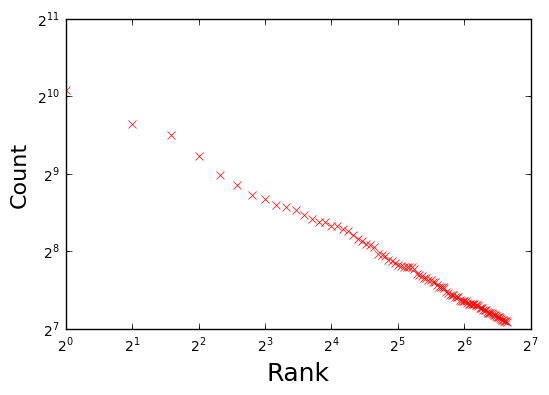

In [37]:
x = rank_list
y = count_list
plt.loglog(x, y, basex=2, basey=2, linestyle='None', marker='x', markeredgecolor='red') #Syntax for matplotlib
plt.xlabel('Rank', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.show()

In [38]:
import csv
with open('ZipFLaw_ArticleAPI_analysis1.csv','w') as fp: #Command to make csv
    a = csv.writer(fp, delimiter = ',',lineterminator='\n')
    a.writerows(ls_ten,) #writerows and writerow would give a single row

# Hence we have proven about ZipF Law that holds true after iterating over so many articles across a long range of dates and fetching the words by rank. The csv file is submitted for exact count as well